In [ ]:
!pip install transformers

     |████████████████████████████████| 3.3 MB 13.5 MB/s 
     |████████████████████████████████| 596 kB 30.0 MB/s 
     |████████████████████████████████| 3.3 MB 24.7 MB/s 
     |████████████████████████████████| 61 kB 476 kB/s 
     |████████████████████████████████| 895 kB 29.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
import torch
#from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
#from transformers import BertTokenizerFast, BertForSequenceClassification
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import gensim
import gensim.downloader as gensim_api
from sklearn.model_selection import train_test_split

# Import data

In [2]:
data = pd.read_csv("review_cleaned.csv")

In [15]:
main_data["date_ymd"]=date_list

<ipython-input-15-de8404ac4f84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data["date_ymd"]=date_list


In [16]:
main_data

,date,text,useful,funny,cool,sum_ufc,useful_label,funny_label,cool_label,date_ymd
0,2020-05-12 21:18:10,leaving room go left sticker shock confronted ...,0.0,0.0,0.0,0,0.0,0.0,0.0,2020-05-12
1,2012-04-03 05:28:46,time general food fine great service always pr...,0.0,0.0,0.0,0,0.0,0.0,0.0,2012-04-03
2,2020-02-21 01:48:36,pork belly entree yummy done right fish chip g...,0.0,0.0,0.0,0,0.0,0.0,0.0,2020-02-21
3,2017-12-29 20:35:49,walked store customer least two staff member w...,0.0,0.0,0.0,0,0.0,0.0,0.0,2017-12-29
4,2019-04-27 14:17:17,sat min lobby nobody work call someone phone s...,0.0,0.0,0.0,0,0.0,0.0,0.0,2019-04-27
...,...,...,...,...,...,...,...,...,...,...
83921,2018-02-07 22:33:56,copacabana cuba caf bookmarked age finally got...,9.0,6.0,11.0,26,0.0,0.0,1.0,2018-02-07
83922,2021-01-27 01:49:00,informative workshop live alone always find si...,10.0,1.0,11.0,22,0.0,0.0,1.0,2021-01-27
83923,2018-12-22 03:57:23,stopped quickly twice stay hilton obviously co...,8.0,1.0,11.0,20,0.0,0.0,1.0,2018-12-22
83924,2017-11-28 00:25:04,really enjoy visiting location specially since...,10.0,9.0,13.0,32,0.0,0.0,1.0,2017-11-28


In [17]:
date_format = "%Y-%m-%d"

In [18]:
days=[]
for k in date_list:
    a = datetime.strptime(k, date_format)
    b = datetime.strptime('2021-02-16', date_format)
    delta=b-a
    days.append(delta.days)

In [19]:
main_data["days"]=days

<ipython-input-19-65ee3a430508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data["days"]=days


In [20]:
main_data

,date,text,useful,funny,cool,sum_ufc,useful_label,funny_label,cool_label,date_ymd,days
0,2020-05-12 21:18:10,leaving room go left sticker shock confronted ...,0.0,0.0,0.0,0,0.0,0.0,0.0,2020-05-12,280
1,2012-04-03 05:28:46,time general food fine great service always pr...,0.0,0.0,0.0,0,0.0,0.0,0.0,2012-04-03,3241
2,2020-02-21 01:48:36,pork belly entree yummy done right fish chip g...,0.0,0.0,0.0,0,0.0,0.0,0.0,2020-02-21,361
3,2017-12-29 20:35:49,walked store customer least two staff member w...,0.0,0.0,0.0,0,0.0,0.0,0.0,2017-12-29,1145
4,2019-04-27 14:17:17,sat min lobby nobody work call someone phone s...,0.0,0.0,0.0,0,0.0,0.0,0.0,2019-04-27,661
...,...,...,...,...,...,...,...,...,...,...,...
83921,2018-02-07 22:33:56,copacabana cuba caf bookmarked age finally got...,9.0,6.0,11.0,26,0.0,0.0,1.0,2018-02-07,1105
83922,2021-01-27 01:49:00,informative workshop live alone always find si...,10.0,1.0,11.0,22,0.0,0.0,1.0,2021-01-27,20
83923,2018-12-22 03:57:23,stopped quickly twice stay hilton obviously co...,8.0,1.0,11.0,20,0.0,0.0,1.0,2018-12-22,787
83924,2017-11-28 00:25:04,really enjoy visiting location specially since...,10.0,9.0,13.0,32,0.0,0.0,1.0,2017-11-28,1176


In [21]:
import math

In [22]:
main_data["hund_days"]=(main_data["days"]/100).astype(int)

<ipython-input-22-173248caae4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data["hund_days"]=(main_data["days"]/100).astype(int)


<AxesSubplot:xlabel='hund_days', ylabel='useful'>

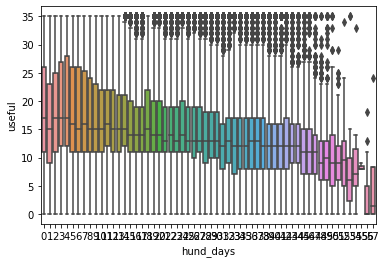

In [23]:
sns.boxplot(x="hund_days",y="useful",data=main_data)

<AxesSubplot:xlabel='hund_days', ylabel='funny'>

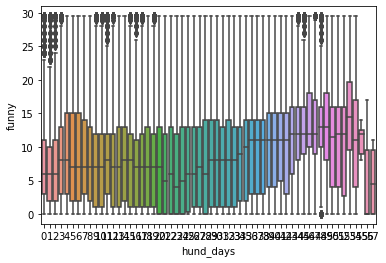

In [24]:
sns.boxplot(x="hund_days",y="funny",data=main_data)

<AxesSubplot:xlabel='hund_days', ylabel='cool'>

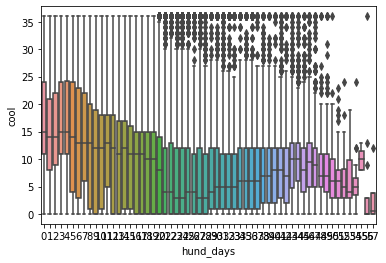

In [25]:
sns.boxplot(x="hund_days",y="cool",data=main_data)

In [87]:
from scipy.stats import zscore
z_useful=main_data.groupby(["hund_days"]).useful.transform(lambda x : zscore(x,ddof=1))

In [88]:
main_data["z_useful"]=z_useful

<AxesSubplot:xlabel='hund_days', ylabel='z_useful'>

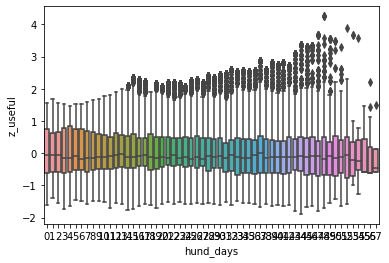

In [89]:
sns.boxplot(x="hund_days",y="z_useful",data=main_data)

In [90]:
z_funny=main_data.groupby(["hund_days"]).funny.transform(lambda x : zscore(x,ddof=1))

In [91]:
main_data["z_funny"]=z_funny

<AxesSubplot:xlabel='hund_days', ylabel='z_funny'>

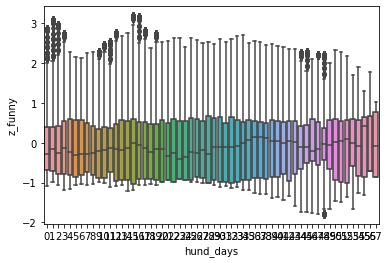

In [92]:
sns.boxplot(x="hund_days",y="z_funny",data=main_data)

In [93]:
z_cool=main_data.groupby(["hund_days"]).cool.transform(lambda x : zscore(x,ddof=1))

In [94]:
main_data["z_cool"]=z_cool

<AxesSubplot:xlabel='hund_days', ylabel='z_cool'>

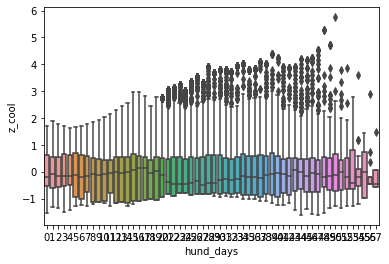

In [95]:
sns.boxplot(x="hund_days",y="z_cool",data=main_data)

#Tfidf

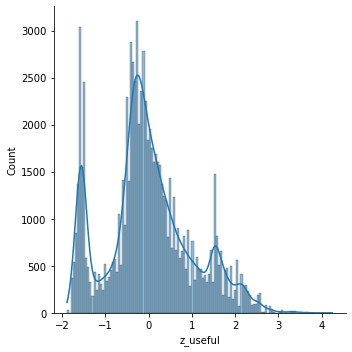

In [96]:
sns.displot(main_data, x="z_useful", kde = True)

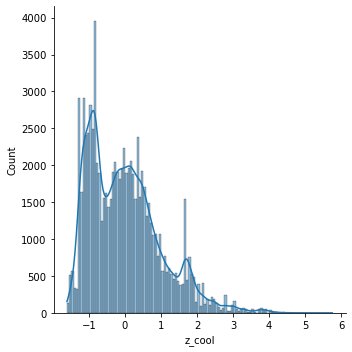

In [97]:
sns.displot(main_data, x="z_cool", kde = True)

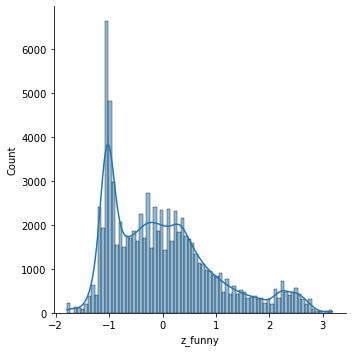

In [98]:
sns.displot(main_data, x="z_funny", kde = True)

In [56]:
training_set=np.load("drive-download-20211215T005337Z-001/training_set.npy",allow_pickle=True)

In [59]:
training_set_emd=np.load("drive-download-20211215T005337Z-001/training_set_embedding.npy",allow_pickle=True)

In [61]:
training_set_emd.shape

(67139, 300)

In [58]:
training_set.shape

(67140, 8)

In [62]:
training_set_df=pd.DataFrame(training_set)

In [66]:
training_set_df.columns = ["text", "useful", "funny", "cool", "sum_ufc", "useful_label", "funny_label", "cool_label"]

In [67]:
training_set_df.head(5)

,text,useful,funny,cool,sum_ufc,useful_label,funny_label,cool_label
0,mary real story tell captive audience breakfas...,12,3.0,12,27,1.0,0.0,1.0
1,picture worthy little vietnamesse cafe cum fre...,30,16.0,25,71,1.0,1.0,1.0
2,continues perform great customer service went ...,12,6.0,9,27,1.0,0.0,0.0
3,first time went lunch friend know owner servic...,11,0.0,0,11,1.0,0.0,0.0
4,worked cameron breed team swbc mortgage year r...,0,0.0,0,0,0.0,0.0,0.0


In [99]:
training_set_z=pd.merge(training_set_df,main_data,on=["text","useful","funny","cool","sum_ufc","useful_label","funny_label","cool_label"],how="inner")

In [105]:
training_set_z.to_csv("training_set_z_scored.csv",index=False)

In [103]:
training_set_df.head(-5)

,text,useful,funny,cool,sum_ufc,useful_label,funny_label,cool_label
0,mary real story tell captive audience breakfas...,12,3.0,12,27,1.0,0.0,1.0
1,picture worthy little vietnamesse cafe cum fre...,30,16.0,25,71,1.0,1.0,1.0
2,continues perform great customer service went ...,12,6.0,9,27,1.0,0.0,0.0
3,first time went lunch friend know owner servic...,11,0.0,0,11,1.0,0.0,0.0
4,worked cameron breed team swbc mortgage year r...,0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
67130,love food particularly white wing bacon wrappe...,0,0.0,0,0,0.0,0.0,0.0
67131,curious george store entire world spot everyth...,14,11.0,14,39,1.0,1.0,1.0
67132,honest like place hell happened beyond right f...,3,14.0,4,21,0.0,1.0,0.0
67133,boy oh boy hate write one ordered pizza dragon...,14,1.0,0,15,1.0,0.0,0.0


In [85]:
training_set_embed=np.load("drive-download-20211215T005337Z-001/training_set_embedding.npy")

In [86]:
training_set_embed

array([[-0.00061366,  0.02215505, -0.01523598, ..., -0.06584875,
         0.03727447,  0.02226501],
       [-0.04374349,  0.06397582,  0.03362274, ..., -0.04946449,
         0.03756835,  0.05080606],
       [-0.01827077,  0.04055838,  0.01014103, ..., -0.08767146,
         0.08182389,  0.00133126],
       ...,
       [-0.05036324,  0.04932283,  0.00205201, ..., -0.05755736,
         0.00801046,  0.05948037],
       [ 0.02162749,  0.03713489, -0.01989536, ..., -0.01439885,
         0.05333841, -0.02765577],
       [ 0.05263785,  0.07477316,  0.02050613, ..., -0.03220438,
         0.0250512 , -0.01114784]], dtype=float32)

In [159]:
# randomly select 80% data as training set, 20% as testing data
training_set ,testing_set = train_test_split(main_data,test_size=0.2)

In [106]:
testing_set=np.load("drive-download-20211215T005337Z-001/testing_set.npy",allow_pickle=True)

In [107]:
testing_set_df=pd.DataFrame(testing_set)

In [108]:
testing_set_df.columns = ["text", "useful", "funny", "cool", "sum_ufc", "useful_label", "funny_label", "cool_label"]

In [109]:
testing_set_z=pd.merge(testing_set_df,main_data,on=["text","useful","funny","cool","sum_ufc","useful_label","funny_label","cool_label"],how="inner")

In [110]:
testing_set_z.to_csv("testing_set_z_scored.csv",index=False)

In [158]:
main_data.head(5)

,date,text,useful,funny,cool,sum_ufc,useful_label,funny_label,cool_label,date_ymd,days,hund_days,z_useful,z_funny,z_cool
0,2020-05-12 21:18:10,leaving room go left sticker shock confronted ...,0.0,0.0,0.0,0,0.0,0.0,0.0,2020-05-12,280,2,-1.554070,-1.067502,-1.361786
1,2012-04-03 05:28:46,time general food fine great service always pr...,0.0,0.0,0.0,0,0.0,0.0,0.0,2012-04-03,3241,32,-1.622739,-1.128261,-0.945291
2,2020-02-21 01:48:36,pork belly entree yummy done right fish chip g...,0.0,0.0,0.0,0,0.0,0.0,0.0,2020-02-21,361,3,-1.717537,-1.186895,-1.487705
3,2017-12-29 20:35:49,walked store customer least two staff member w...,0.0,0.0,0.0,0,0.0,0.0,0.0,2017-12-29,1145,11,-1.689743,-1.111349,-1.283245
4,2019-04-27 14:17:17,sat min lobby nobody work call someone phone s...,0.0,0.0,0.0,0,0.0,0.0,0.0,2019-04-27,661,6,-1.471104,-1.029794,-1.244533


In [157]:
main_data.drop(columns=["norm_useful"],inplace=True)

In [160]:

tfidf = TfidfVectorizer(max_features = 3000)
training_set_tfidf = tfidf.fit_transform(training_set['text'].values.tolist())
testing_set_tfidf = tfidf.transform(testing_set['text'].values.tolist())